In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Linear regression

weight = 0.7
bias = 0.3

# Create

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X), len(y)

(50, 50)

In [5]:
# Training and test sets #

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

Visualize

In [6]:
def plot_prediction(train_data = X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    predictions = None):
    
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c='b', s=4, label='Training data')
    plt.scatter(test_data, test_labels, c='g', s=4, label='Testing data')

    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')
    plt.legend(prop={"size": 14})


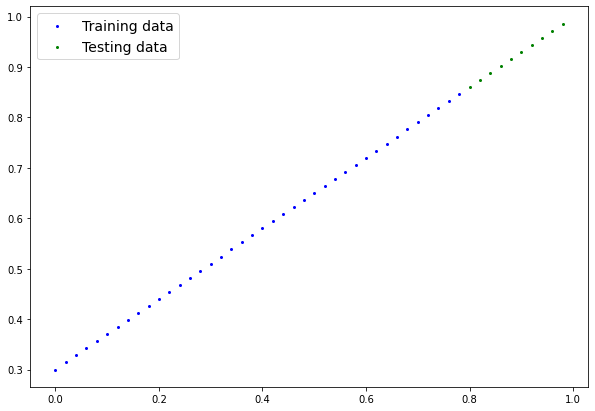

In [7]:
plot_prediction()

Build linear regression model

In [8]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.rand(1,
                                               requires_grad=True,
                                               dtype=torch.float))
        self.bias = nn.Parameter(torch.rand(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias # LINEAR REGRESSION FORMULA

In [102]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [103]:
model_0.state_dict(), weight, bias

(OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))]),
 0.7,
 0.3)

In [105]:
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

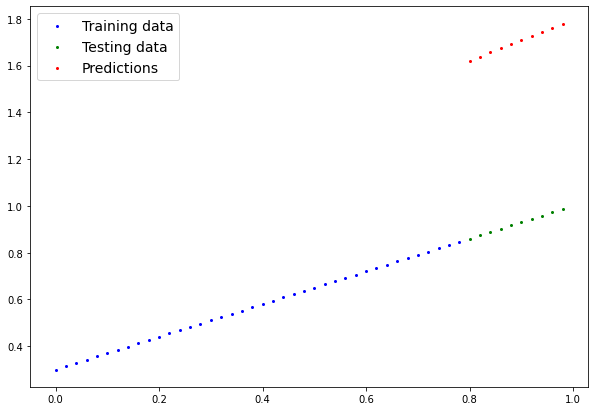

In [106]:
plot_prediction(predictions=y_preds)

In [107]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [167]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.00001)

Training Loop

In [175]:
torch.manual_seed(42)
epochs = 10

for epoch in range(epochs):
    model_0.train() # Sets parameters that require gradience to require gradient

    # Forward pass
    y_pred = model_0(X_train)

    # Calculate loss
    loss = loss_fn(y_pred, y_train)
    print(loss)
    
    optimizer.zero_grad()

    # Perform backpropagation on the loss with respect to parameters
    loss.backward() # Start fresh each iteration

    # Step the optimizer (perform gradient descend)
    optimizer.step() # By default will accumulate through the loop, so zero them above

model_0.eval() # Turns off gradient tracking

tensor(6.0678e-06, grad_fn=<L1LossBackward0>)
tensor(5.4568e-06, grad_fn=<L1LossBackward0>)
tensor(6.0678e-06, grad_fn=<L1LossBackward0>)
tensor(5.4568e-06, grad_fn=<L1LossBackward0>)
tensor(6.0678e-06, grad_fn=<L1LossBackward0>)
tensor(5.4568e-06, grad_fn=<L1LossBackward0>)
tensor(6.0678e-06, grad_fn=<L1LossBackward0>)
tensor(5.4568e-06, grad_fn=<L1LossBackward0>)
tensor(6.0678e-06, grad_fn=<L1LossBackward0>)
tensor(5.4568e-06, grad_fn=<L1LossBackward0>)


LinearRegressionModel()

In [176]:
list(model_0.eval().parameters())

[Parameter containing:
 tensor([0.7000], requires_grad=True),
 Parameter containing:
 tensor([0.3000], requires_grad=True)]

In [177]:
list(model_0.eval().parameters())

[Parameter containing:
 tensor([0.7000], requires_grad=True),
 Parameter containing:
 tensor([0.3000], requires_grad=True)]

In [178]:
predictions = model_0(X_test)
predictions, y_test

(tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]], grad_fn=<AddBackward0>),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [180]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)


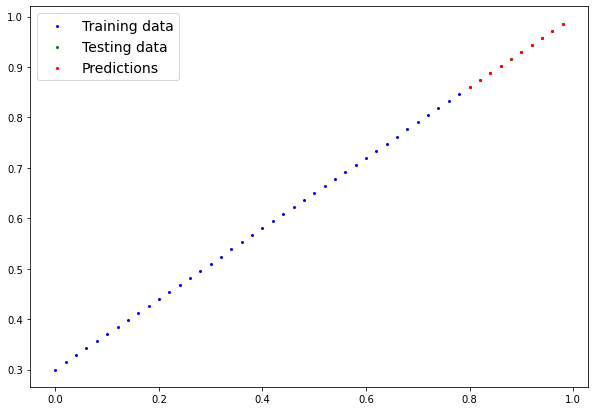

In [181]:
plot_prediction(predictions=y_preds_new)